<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Set 1 

In [1]:
import os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import pylab as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)


import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
! pip install geopandas #this is how you install packages on colab
import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 18.2 MB/s eta 0:00:00


In [8]:
from google.colab import files
uploaded = files.upload()

Saving appdata.csv to appdata (1).csv


In [9]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'appdata (1).csv', 'appdata.csv', 'sample_data']

In [12]:
dat=pd.read_csv('appdata (1).csv')

In [13]:
dat.columns

Index(['ID ', 'Degree Type', 'Final Recommended Decision', 'Admit-Coming',
       'Application Created Date', 'Days Before the Beginning of Semester ',
       'Domestic or INTL Applicant', 'Reporting Term', 'Age When Applied',
       'Mailing Zip/Postal Code', 'Mailing State/Province', 'Mailing Country',
       'Most Recent Educational Institution: Account Name', 'Gender', 'Race',
       'Program Selection: Program Selection Name', 'Admissions Status'],
      dtype='object')

In [14]:
dat.head(2)

,ID,Degree Type,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Domestic or INTL Applicant,Reporting Term,Age When Applied,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,12/7/2021,273,International,Fall 2022,23.0,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,1/2/2022,247,International,Fall 2022,21.0,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App


In [15]:
dat["Age When Applied"].mean()


28.10944625407166

In [16]:
dat['Age When Applied'].median()

25.0

In [19]:
dat['Age When Applied'].mode()

0    23.0
dtype: float64

In [21]:
dat['Age When Applied'].value_counts()

23.0    197
22.0    183
24.0    160
25.0    149
26.0    109
27.0     90
30.0     66
28.0     65
21.0     60
29.0     55
31.0     43
33.0     40
34.0     33
32.0     30
35.0     28
37.0     22
41.0     18
38.0     17
39.0     15
36.0     15
43.0     15
40.0     15
54.0     10
42.0     10
19.0     10
18.0      9
20.0      6
49.0      6
47.0      6
52.0      5
46.0      5
51.0      5
45.0      4
50.0      4
55.0      4
48.0      4
57.0      3
56.0      3
53.0      2
58.0      2
44.0      2
61.0      2
60.0      2
64.0      1
71.0      1
67.0      1
65.0      1
59.0      1
62.0      1
Name: Age When Applied, dtype: int64

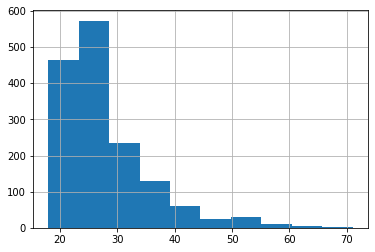

In [22]:
dat['Age When Applied'].hist()

In [23]:
pd.crosstab(dat["Age When Applied"], dat["Admit-Coming"])

Admit-Coming,0,1
Age When Applied,,
18.0,9,0
19.0,10,0
20.0,6,0
21.0,45,15
22.0,145,38
23.0,151,46
24.0,129,31
25.0,125,24
26.0,91,18


In [27]:
pd.crosstab(dat["Admit-Coming"], dat["Age When Applied"] )

Age When Applied,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,57.0,58.0,59.0,60.0,61.0,62.0,64.0,65.0,67.0,71.0
Admit-Coming,,,,,,,,,,,,,,,,,,,,,
0,9,10,6,45,145,151,129,125,91,71,...,2,1,1,1,1,0,1,1,1,1
1,0,0,0,15,38,46,31,24,18,19,...,1,1,0,1,1,1,0,0,0,0


In [34]:
dat['Gender'].value_counts()

Female    852
Male      686
Name: Gender, dtype: int64

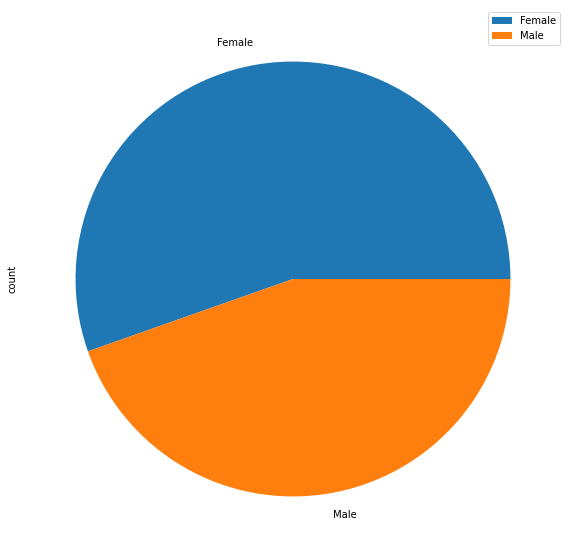

In [49]:
df = pd.DataFrame({'Applicants': [852, 686],
                   'radius': [2439.7, 6051.8]},
                  index=['Female', 'Male',])
plot = df.plot.pie(y='count', figsize=(10, 10))

In [36]:
dat['Race'].value_counts()

Asian                                                                 531
White                                                                 471
Black or African American                                             302
Hispanic or Latino                                                     73
Hispanic or Latino; White                                              16
Asian; White                                                           14
Black or African American; Hispanic or Latino                           9
Black or African American; White                                        5
American Indian or Alaska Native; Black or African American             4
Asian; Black or African American                                        2
White; Other,White                                                      2
Asian; White; White,Asian                                               1
Other                                                                   1
Asian; Hispanic or Latino             

In [59]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import matplotlib.pyplot as plt
import squarify 

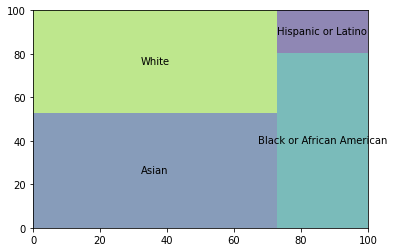

In [64]:
import matplotlib.pyplot as plt
import squarify 
sizes=[531, 471, 302, 73]
label=["Asian", "White", "Black or African American", "Hispanic or Latino"]
color=['red','blue','green','grey']
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.show()